In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv("/content/filtered_data.csv") ;
data

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
32443,47539,493819,85176,SEWING SUSAN 21 NEEDLE SET,576,2010-01-07 12:34:00,0.64,14156.0,EIRE
32444,47540,493819,37345,ASSTD HEARTS DESIGN MUGS,280,2010-01-07 12:34:00,1.65,14156.0,EIRE
32445,47541,493819,21908,CHOCOLATE THIS WAY METAL SIGN,192,2010-01-07 12:34:00,1.85,14156.0,EIRE
32446,47542,493819,21614,SET OF 12 ROSE BOTANICAL T-LIGHTS,192,2010-01-07 12:34:00,2.55,14156.0,EIRE


In [36]:
data['Description']= data['Description'].str.strip();
data.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country'],
      dtype='object')

In [0]:
new_data =data.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice')

In [38]:
new_data

Description,11 PC CERAMIC TEA SET POLKADOT,12 ASS ZINC CHRISTMAS DECORATIONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MINI TOADSTOOL PEGS,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED SPOTTY,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,24 HANGING EASTER EGGS FLORAL TUB,3 BLACK CATS W HEARTS BLANK CARD,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE JIGSAW TOADSTOOLS,3 ROSE MORRIS BOXED CANDLES,3 STRIPEY MICE FELTCRAFT,3 WHITE CHOC MORRIS BOXED CANDLES,3 WICK CHRISTMAS BRIAR CANDLE,36 PENCILS TUBE POSY,36 PENCILS TUBE RED SPOTTY,36 PENCILS TUBE SKULLS,36 PENCILS TUBE WOODLAND,3D DOG PICTURE PLAYING CARDS,3D HEARTS HONEYCOMB PAPER GARLAND,3D SHEET OF CAT STICKERS,3D SHEET OF DOG STICKERS,...,WRAP BLUE REINDEER,WRAP BLUE RUSSIAN FOLKART,WRAP BOUDOIR,WRAP CHRISTMAS SCREEN PRINT,WRAP DAISY CARPET,WRAP ENGLISH ROSE,WRAP FOLK ART,WRAP GREEN RUSSIAN FOLKART,WRAP PINK FAIRY CAKES,WRAP ROMANTIC DECOUPAGE,WRAP SPEED DEMONS,WRAP WINTER FOREST,"WRAP, FRIENDSHIP ON GREEN","WRAP,SUKI AND FRIENDS",YELLOW + BROWN BEAR FELT PURSE KIT,YELLOW BIRDS FELT DES FOODCOVER,YELLOW BREAKFAST CUP AND SAUCER,YELLOW DRAGONFLY HELICOPTER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW KNITTED KIDS RUCKSACK,YELLOW METAL CHICKEN HEART,YELLOW POT PLANT CANDLE,YELLOW PURPLE DAISY FELT PURSE KIT,YELLOW RED FLOWER PIGGY BANK,YELLOW SHARK HELICOPTER,YELLOW/PINK FLOWER DESIGN BIG MUG,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
Invoice,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

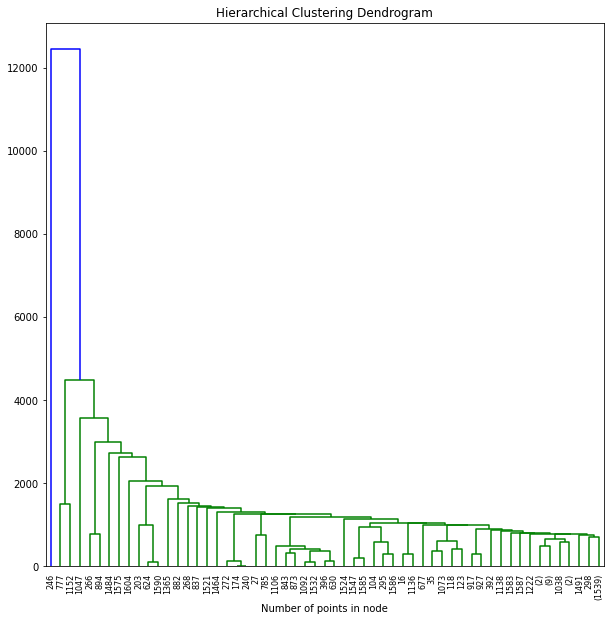

In [18]:

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dend = dendrogram(linkage_matrix, **kwargs)
    return dend
X = np.array(new_data)
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.figure(figsize=(10,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top levels of the dendrogram
dend = plot_dendrogram(model, truncate_mode='level',leaf_font_size=8, get_leaves=True) #p is the number of levels
plt.xlabel("Number of points in node")
plt.show()

In [0]:
exp_data=data.drop(columns=['Invoice','StockCode','InvoiceDate'],axis=1)

In [41]:
exp_data

,Unnamed: 0,Description,Quantity,Price,Customer ID,Country
0,0,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom
1,1,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
2,2,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom
3,3,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom
4,4,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...
32443,47539,SEWING SUSAN 21 NEEDLE SET,576,0.64,14156.0,EIRE
32444,47540,ASSTD HEARTS DESIGN MUGS,280,1.65,14156.0,EIRE
32445,47541,CHOCOLATE THIS WAY METAL SIGN,192,1.85,14156.0,EIRE
32446,47542,SET OF 12 ROSE BOTANICAL T-LIGHTS,192,2.55,14156.0,EIRE
